<a href="https://colab.research.google.com/github/ChaeyeonHan/2022_ML_Study/blob/main/lab01~lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab01

In [ ]:
# 텐서플로우 설치 확인(코랩은 설치 필요 X)
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2939 - acc: 0.9136
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1428 - acc: 0.9577
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1096 - acc: 0.9670
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0895 - acc: 0.9720
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0755 - acc: 0.9767


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.07397478409912438, 0.9769]

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
# 텐서플로우가 2.0대 버전으로 넘어가면서 더이상 session모듈을 지원하지 X
# print를 사용하면 값이 바로 출력되지 않고. session.run()을 이용한다. -> forward함수
#   https://www.tensorflow.org/guide/migrate?hl=ko
# 결과에서 b는 bytes literal

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
hello = tf.constant("Hello, Tensorflow!")

sess = tf.Session()
print(sess.run(hello))

b'Hello, Tensorflow!'


In [ ]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

# print("node1: ", node1, "node2: ", node2)
# print("node3: ", node3)

def forward():
    return node1+node2
output = forward()
print(output)

sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

Tensor("add_4:0", shape=(), dtype=float32)
sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [ ]:
# placeholder : 심볼릭 변수를 정의, constant()함수를 이용해서 상수 정의
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1, 3], b:[2, 4]}))

7.5
[3. 7.]


# 머신러닝 분류
머신러닝의 학습방법에 따라 세가지로 나눌 수 있다. 

1. 지도학습(Supervised Learning)

2. 비지도학습(Unsupervised Learning)

3. 강화학습(Reinforcement Learning)


# 지도학습
지도학습은 문제와 정답(labeled data, training set)을 알려주고 학습시키는 방법이다. 

예를 들어, 고양이의 사진을 주고 이건 고양이라고 알려주며 학습시킨다.(label이 달린 자료) 


1-1) 회귀(Regression)

    : 예측하고 싶은 종속변수가 양적데이터(숫자)일때 사용한다.

      어떤 데이터들의 특징을 바탕으로 값을 예측하는 방법이다. 
      ex) 시험 점수 예측 

1-2) 분류(Classification)

    : 대상을 그룹핑하는 방식이다. 종속변수가 범주형데이터(이름)일때 사용한다. 

      이진분류(Binary Classification) : P/F 처럼 두가지 중에 하나로 분류하는 것
      다중분류(Multi-label Classification) : 여러개의 값들 중에 하나로 분류하는 것 ex) 학점

 

# 비지도학습
지도학습과는 달리, 컴퓨터에게 정답을 알려주지 않고, 데이터에 대한 통찰력을 부여하는 것이다. (label이 정해지지X)

사람과 고양이, 강아지의 사진을 주고 사진이 어느 class에 속하는지 알려주지 않고, 컴퓨터 각 사진들을 보며 특징을 파악해 학습하는 것이다. 

2-1) 군집화(Cluster)

    : 비슷한 것들을 찾아 그룹을 만드는 것 (어떤 그룹에 속하는지 찾는 것) 

2-2) 연관규칙학습(Associated Rule Learning)

    : 비슷한 것들을 찾아 그룹을 만드는 것 
      ex) 라면구매자 -> 계란을 산다 -> 라면과 계란의 상관관계가 무엇일까


# 강화학습
강화학습은 일단 해보고 경험을 통해 방법을 얻는 것이다. 

상와 벌이라는 보상(reward)을 통해 상을 최대화, 보상을 최소화 하도록 학습하는 방식 

 

강화학습의 대표적인 알고리즘 : Q-러닝, SARSA, 인공신경망을 사용한 DQN


# Linear Regression
H(x) = Wx + b (일차방정식의 형태)

머신러닝 알고리즘 중 하나로 데이터를 가장 잘 설명할 수 있는 1차 함수를 찾는 방법

실제 데이터와 가설의 데이터의 거리를 Cost(Loss) function이라고 한다. 
(우리가 세운 가설과 실제 데이터가 얼마나 다른가)

선형회귀의 목표는 입력데이터(x)와 타깃데이터(y)를 통해 기울기와 절편을 찾는 것이다. 

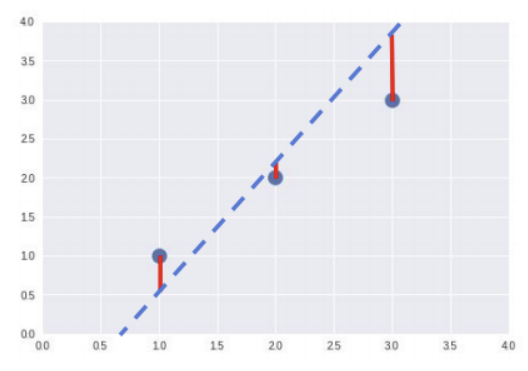

# Cost Function

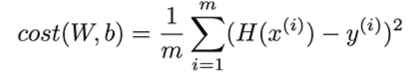


차를 제곱해준다. 

-> 차가 +/-인 경우에 서로 상쇄되는 것을 방지하고, 제곱을 해줌으로써 패널티를 크게 만들어준다.  

가장 작은 값 만드는 W와 b를 찾는 것이 선형회귀의 목적

# Lab02

- build graph using tensorflow operations (그래프 build)
- feed data and run graph (그래프 실행)
- update variables in the graph (그래프를 update)

In [ ]:
# 첫번째 단계 : 그래프 구현
# x와 y의 값이 주어진다.
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# W와 b를 정의 : Variable로 정의, 랜덤한 수를 준다
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 우리의 가설
hypothesis = x_train * W + b

# cost function : 차를 제곱해 평균내준다
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  # tf.reduce_mean(리스트)

# 비용 최소화를 위해 Gradient Descent 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [ ]:
# 두번째 단계
# 실행을 위해 sess를 만들고, 변수 초기화를 시켜준다. 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습이 일어나며, 비용과 W, b의 값이 변한다. (W=1, b=0이 정답)
for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

0 9.327887 [-0.1790023] [-0.54047585]
20 0.08461646 [0.89463824] [-0.06715363]
40 0.00080638676 [0.9965452] [-0.02134684]
60 4.290817e-05 [1.0059396] [-0.01628248]
80 3.2719443e-05 [1.0065395] [-0.0151306]
100 2.9659475e-05 [1.0063158] [-0.01438265]
120 2.693624e-05 [1.006027] [-0.01370318]
140 2.4463763e-05 [1.0057445] [-0.01305881]
160 2.2218386e-05 [1.0054746] [-0.01244506]
180 2.017916e-05 [1.0052173] [-0.0118602]
200 1.83274e-05 [1.0049721] [-0.01130285]
220 1.664521e-05 [1.0047385] [-0.01077163]
240 1.5117476e-05 [1.0045158] [-0.01026541]
260 1.3729954e-05 [1.0043036] [-0.00978296]
280 1.2469493e-05 [1.0041013] [-0.0093232]
300 1.1324729e-05 [1.0039085] [-0.00888503]
320 1.02853965e-05 [1.0037249] [-0.00846747]
340 9.341544e-06 [1.0035498] [-0.00806955]
360 8.483969e-06 [1.003383] [-0.0076903]
380 7.705668e-06 [1.003224] [-0.00732892]
400 6.998225e-06 [1.0030725] [-0.00698448]
420 6.3557673e-06 [1.0029281] [-0.00665624]
440 5.7725388e-06 [1.0027905] [-0.00634344]
460 5.24298e-06 

In [ ]:
# placeholder를 사용해보기
# 사용 이유 : 만들어진 모델에 대해서 값을 따로 넘겨줄 수 있다. 모델을 만들고 값을 변경시키며 shape도 함께 줄 수 있음.
# placeholder : 선언과 동시에 초기화하는 것이 아니라 일단 선언 후 그 다음에 값을 전달한다.
# 반드시 실행시 데이터가 전달되어야 한다. 

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

for step in range(2001):
  cost_val, W_val, b_val, _ = \
  sess.run([cost, W, b, train], 
            feed_dict={X:[1, 2, 3], Y:[1, 2, 3]})  # feed_dict로 값을 넘겨주기
  if step % 20 == 0:
    print(step, cost_val, W_val, b_val)

0 1.3323465e-11 [1.0000044] [-8.861246e-06]
20 1.3323465e-11 [1.0000044] [-8.861246e-06]
40 1.3323465e-11 [1.0000044] [-8.861246e-06]
60 1.3323465e-11 [1.0000044] [-8.861246e-06]
80 1.3323465e-11 [1.0000044] [-8.861246e-06]
100 1.3323465e-11 [1.0000044] [-8.861246e-06]
120 1.3323465e-11 [1.0000044] [-8.861246e-06]
140 1.3323465e-11 [1.0000044] [-8.861246e-06]
160 1.3323465e-11 [1.0000044] [-8.861246e-06]
180 1.3323465e-11 [1.0000044] [-8.861246e-06]
200 1.3323465e-11 [1.0000044] [-8.861246e-06]
220 1.3323465e-11 [1.0000044] [-8.861246e-06]
240 1.3323465e-11 [1.0000044] [-8.861246e-06]
260 1.3323465e-11 [1.0000044] [-8.861246e-06]
280 1.3323465e-11 [1.0000044] [-8.861246e-06]
300 1.3323465e-11 [1.0000044] [-8.861246e-06]
320 1.3323465e-11 [1.0000044] [-8.861246e-06]
340 1.3323465e-11 [1.0000044] [-8.861246e-06]
360 1.3323465e-11 [1.0000044] [-8.861246e-06]
380 1.3323465e-11 [1.0000044] [-8.861246e-06]
400 1.3323465e-11 [1.0000044] [-8.861246e-06]
420 1.3323465e-11 [1.0000044] [-8.861246

# Gradient Descent Algorithm
: 경사하강법(경사를 따라 내려가는 알고리즘)

    : 주어진 cost function을 최소화하는데 사용됨
      cost를 가장 작게 만드는 W,b를 찾는 것이다.
      랜덤한 지점에서 시작하고, W와 b의 값을 조금씩 바꾸면서 cost의 값을 줄인다. 
      -> 어떤 점에서 시작하든지, 항상 최저점에 도달할 수 있다는게 이 알고리즘의 장점이다. 

      + 경사하강법(Gradient Descent)은 적절한 직선의 방정식을 찾기 위해 기울기(변화율)를 사용하여 모델을 조정하는 최적화 알고리즘이다.  
      손실함수(Loss Function)가 정의되었을 때, 손실함수의 값이 최소가 되는 지점을 찾아가는 방법이다. 
      (손실함수란 예상값과 실제 타깃값의 차이를 함수로 정의한 것을 뜻한다.)


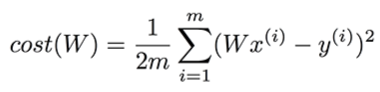


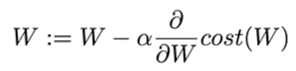

alpha = learning_rate

cost함수를 미분해서(해당 점에서의 기울기를 구해서) 기울기가 음수라면, W에 값을 더해서 큰 값으로 움직여주며 W의 값을 이동시켜준다. 

# Lab03

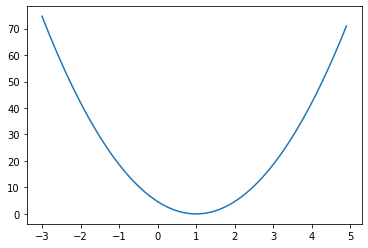

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis-Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []  # W의 값과, cost의 값을 저장해 그래프를 그린다.
cost_val = []
for i in range(-30, 50):  # W가 -3~5까지 이동하며 움직인다
  feed_W = i * 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
  W_val.append(curr_W)  # 리스트에 값을 넣고 확인
  cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()

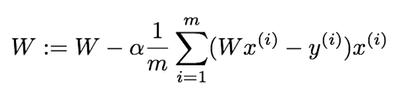

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

# 텐서플로우 구현 방법
learning_rate = 0.1  # alpha
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# 직접 미분할 필요X -> 텐서플로우에 있는 optimizer이용 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)


# 그래프이기에 session 사용
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
  sess.run(update, feed_dict={X : x_data, Y : y_data})  # 값을 업데이트 시켜준다
  print(step, sess.run(cost, feed_dict={X : x_data, Y : y_data}), sess.run(W))

0 8.145917 [-0.32119405]
1 2.3170614 [0.29536313]
2 0.6590752 [0.62419367]
3 0.18747032 [0.79956996]
4 0.053324923 [0.89310396]
5 0.015167959 [0.9429888]
6 0.004314428 [0.96959406]
7 0.0012272185 [0.9837835]
8 0.0003490748 [0.9913512]
9 9.9291996e-05 [0.9953873]
10 2.824419e-05 [0.9975399]
11 8.034039e-06 [0.9986879]
12 2.2850893e-06 [0.99930024]
13 6.499563e-07 [0.9996268]
14 1.8481792e-07 [0.999801]
15 5.2601646e-08 [0.99989384]
16 1.494935e-08 [0.9999434]
17 4.258099e-09 [0.9999698]
18 1.204801e-09 [0.9999839]
19 3.43789e-10 [0.9999914]
20 9.884715e-11 [0.9999954]


In [ ]:
# W가 5일때의 예제
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# minimize : gradient descent magic 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(100):
  print(step, sess.run(W))
  sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
